In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os.path 
import math 

from modules import conversions as convs

In [59]:
name='1_001'
lattice='hcp'
pa_current = os.getcwd()
pa_txt = pa_current + '/pyinputs/' + name + '.txt'
pa_parent = os.path.dirname(pa_current)
gbdata = np.genfromtxt(pa_txt)

dim=1

In [60]:
#path = pa_parent+'/wield/bin'
#os.chdir(path)
#os.system('mkdir '+name)

Eul1 = gbdata[:,(0,1,2)] # RAD
Eul2 = gbdata[:,(3,4,5)] # RAD

xe1 = gbdata[:, 16]
ye1 = gbdata[:, 15]
xe2 = gbdata[:, 18]
ye2 = gbdata[:, 17]

misor = gbdata[:,6]
trace = gbdata[:,14]

i=0

In [62]:
### Matrix to transform coordinates into WIELD default frame.
Base = ([[1,0,0],[0,0,-1],[0,1,0]])

pathout=pa_current+'/energy_input/'+name

os.system('mkdir -p '+ pathout)

if dim == 1:
    while i < len(gbdata):
      
        #### Create temporary input file for convenience
    
        infile = '/en_'+str(i)+'.in'        # Name of input file
        fout = open(pathout+infile, 'w')    # .in location
        fout.write('#$Energy2D\n$CSL\n$a 3.217\n$Sigma1 0.1\n$Sigma2 $Sigma1\n')
        fout.write('$Epsilon 0.25\n$Order1 64\n$Order2 $Order1\n\n$AlphaX1 $a\n$AlphaY1 $a\n$AlphaZ1 $a\n\n')
        fout.write('$X1 0. 0.5*$a 0.5*$a 0.5*$a 0.5*$a -0.5*$a -0.5*$a -0.5*$a -0.5*$a\n')
        fout.write('$Y1 0. 0.5*$a 0.5*$a -0.5*$a -0.5*$a 0.5*$a 0.5*$a -0.5*$a -0.5*$a\n')
        fout.write('$Z1 0. 0.5*$a -0.5*$a 0.5*$a -0.5*$a 0.5*$a -0.5*$a 0.5*$a -0.5*$a\n')
        fout.write('\n$AlphaX2 $AlphaX1\n$AlphaY2 $AlphaY1\n$AlphaZ2 $AlphaZ1\n')
        fout.write('$X2 $X1\n$Y2 $Y1\n$Z2 $Z1\n\n$Tolerence 1E-16\n\n')
        
        # DEFINITION OF THE AXIS ROTATION
        #fout.write('$AxisX1 0 0 1\n$AxisZ1 1 0 0\n$AxisX2 0 0 1\n$AxisZ2 1 0 0\n\n') # TILT QUESTION      
        
        ### Line for 1D calculations
        #fout.write('$ThetaRotX1 1\n$ThetaRotX2 1\n$ThetaMin -90\n$ThetaMax 90\n$DTheta 5')
        
        ### Line for 2D calculations
        fout.write('$ThetaRotX1 1\n$ThetaRotX2 1\n$ThetaMin 0.0\n$ThetaMax 60\n$DTheta 0.1\n')
        
        fout.write('\n$BungeEuler1 '+str(np.degrees(Eul1[i,0]))+' '+str(np.degrees(Eul1[i,1]))+' '+str(np.degrees(Eul1[i,2]))+'\n')
        fout.write('$BungeEuler2 '+str(np.degrees(Eul2[i,0]))+' '+str(np.degrees(Eul2[i,1]))+' '+str(np.degrees(Eul2[i,2]))+'\n')
        fout.write('$TraceAngle '+str(trace[i])+'\n')
        
        outfile = 'output_'+str(name)+'_'+str(i)+'.ref'
        fout.write('\n$OutFile ' + str(outfile))
        #fout.write('\n$OutFile output.ref')
        
        #fout.write('$RotAxes1 z x z x\n$Rots1  ($phi2_1) ($Phi_1) ($phi1_1) 90\n')
        #fout.write('$RotAxes2 z x z x\n$Rots2  ($phi2_2) ($Phi_2) ($phi1_2) 90\n')

        fout.close()
        
        #os.system('./bin/wield tests/energy_input/'+ str(name) + str(infile)+' -v -n 2')
        print (name, 'Boundary', i,'/',len(gbdata))
        break




# os.system('mv -v '+path+'/'+name+'/ '+pa_parent+'/ebsd_energy/outputs/'+name+'/energy') # It is of string type that tells which command to execute.

1_001 Boundary 0 / 3934


In [ ]:
else:
    print('Wrong dimension')

print('Energy calculations for '+name+' finished.')
print(pa_current)


try:
    #os.system('mkdir '+pa_parent+'/ebsd_energy/outputs/'+name+'/energy')
    os.system('mkdir '+pa_current+'/ebsd_energy/outputs/'+name)
    np.savetxt(pa_current+'/outputs/'+name+'/selected.ref', selected)
except:
    print ('path already exists')
    

In [7]:
gg1

array([[ 0.99654864,  0.07892286, -0.02572925],
       [-0.04429263,  0.24340682, -0.96891242],
       [-0.07020667,  0.96670797,  0.24606244]])

In [20]:
x_sab = []
y_sab = []

sab_energy=np.loadtxt('/home/estanislao/Documents/ML_GB/GrainLearning/saboutputs/1_001/energy/1_001/en_0.out')
for row in sab_energy:
    x_sab.append(int(row[0]))
    y_sab.append(float(row[1]))

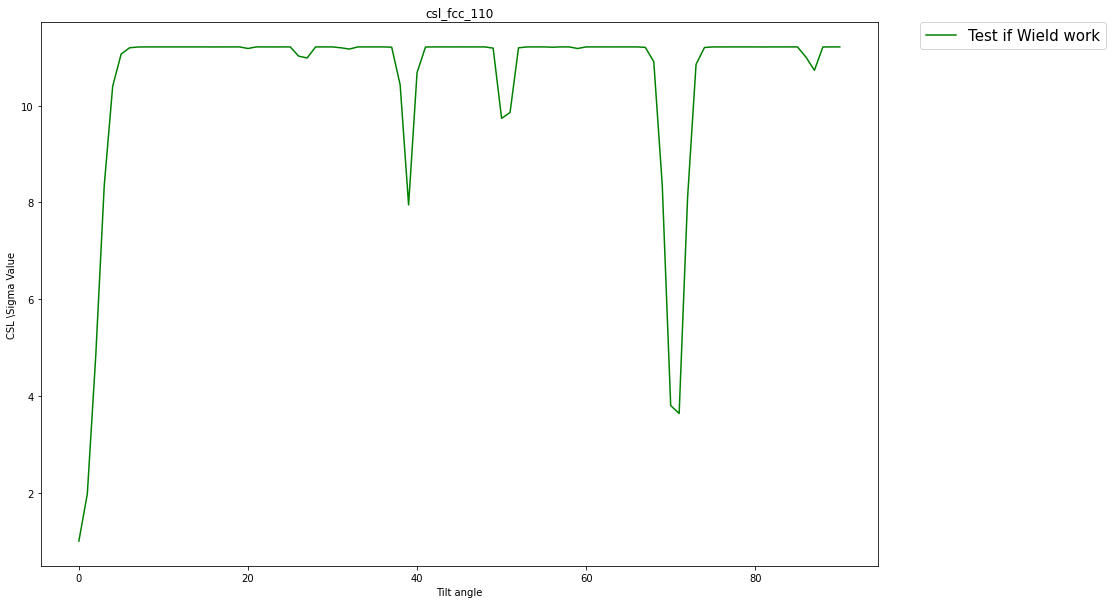

In [57]:
x_test_wield = []
y_test_wield = []

test_energy_wield=np.loadtxt('/home/estanislao/Documents/ML_GB/GrainLearning/output.ref')
for row in test_energy_wield:
    x_test_wield.append(int(row[0]))
    y_test_wield.append(float(row[1]))

plt.figure(figsize=(15,10))
plt.plot(x_test_wield, y_test_wield, 'g', label='Test if Wield work')
plt.title('csl_fcc_110')
plt.xlabel('Tilt angle')
plt.ylabel('CSL \Sigma Value')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 15}, loc='upper left', borderaxespad=0.)
plt.show()

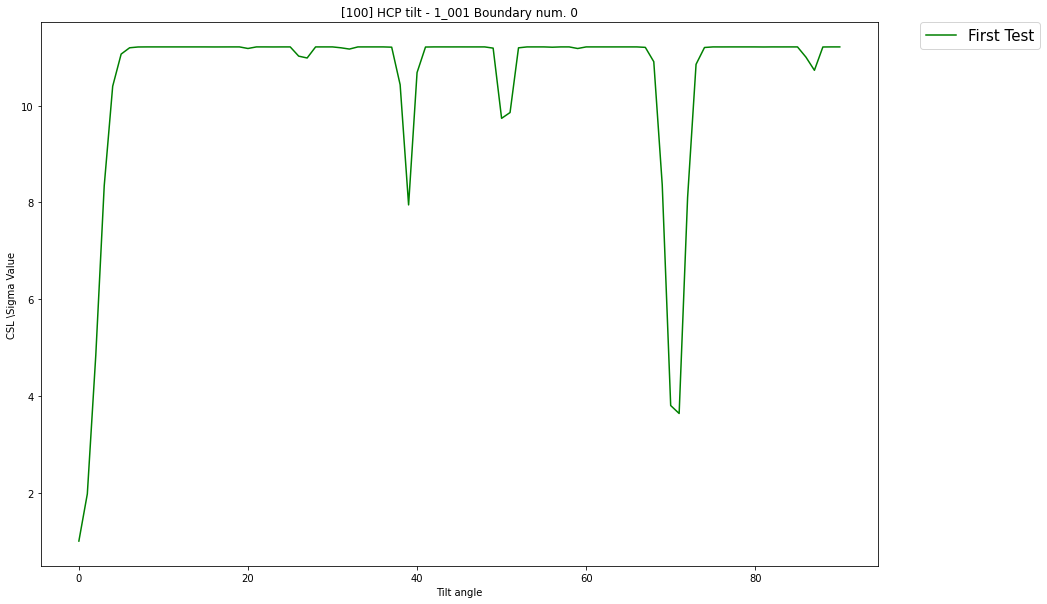

In [4]:
plt.figure(figsize=(15,10))
plt.plot(x_test, y_test, 'g', label='First Test')

plt.title('[100] HCP tilt - 1_001 Boundary num. 0')
plt.xlabel('Tilt angle')
plt.ylabel('CSL \Sigma Value')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 15}, loc='upper left', borderaxespad=0.)
#plt.annotate('3', xy=(71, 3.63656),arrowprops=dict(facecolor='black'),)
#plt.savefig('First_test.png')
plt.show()

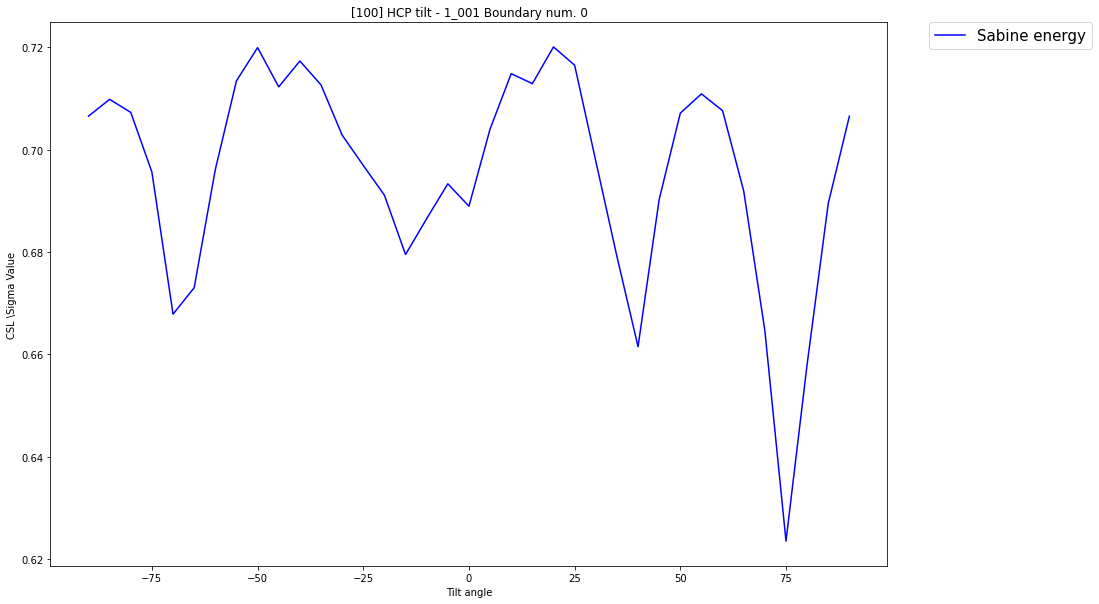

In [45]:
plt.figure(figsize=(15,10))
plt.plot(x_sab, y_sab, 'b', label='Sabine energy')

plt.title('[100] HCP tilt - 1_001 Boundary num. 0')
plt.xlabel('Tilt angle')
plt.ylabel('CSL \Sigma Value')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 15}, loc='upper left', borderaxespad=0.)
plt.show()

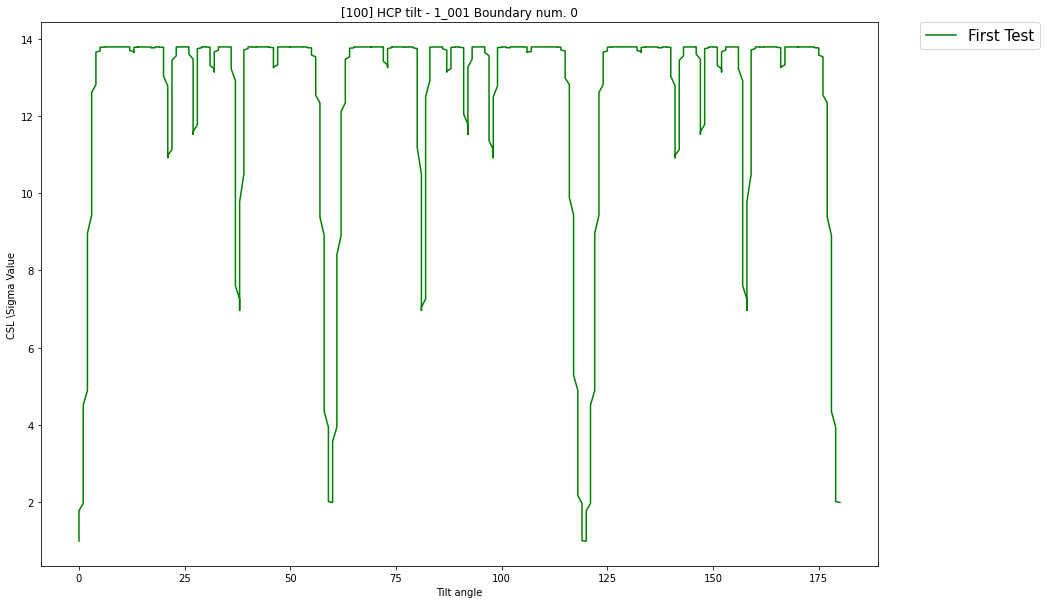

In [46]:
plt.figure(figsize=(15,10))
plt.plot(x_test, y_test, 'g', label='First Test')

plt.title('[100] HCP tilt - 1_001 Boundary num. 0')
plt.xlabel('Tilt angle')
plt.ylabel('CSL \Sigma Value')
plt.legend(bbox_to_anchor=(1.05, 1), prop={'size': 15}, loc='upper left', borderaxespad=0.)
#plt.annotate('3', xy=(71, 3.63656),arrowprops=dict(facecolor='black'),)
#plt.savefig('First_test.png')
plt.show()